Model Building

In [ ]:
#pip install keras_squeezenet

In [ ]:
import numpy as np
from keras_squeezenet import SqueezeNet

from keras.models import Model, load_model
from keras.optimizers import adam_v2
from keras.utils import np_utils

from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# from keras_applications.imagenet_utils import _obtain_input_shape 
# from keras.utils.layer_utils import get_source_inputs

In [ ]:
import os

In [ ]:
def def_model_param():
    GESTURE_CATEGORIES = len(CATEGORY_MAP)
    base_model = Sequential()
    base_model.add(SqueezeNet(input_shape=(224, 224, 3), include_top=False))
    base_model.add(Dropout(0.5))
    base_model.add(Convolution2D(GESTURE_CATEGORIES, (1, 1), padding='valid'))
    base_model.add(Activation('relu'))
    base_model.add(GlobalAveragePooling2D())
    base_model.add(Activation('softmax'))

    return base_model

In [ ]:
def label_mapper(val):
    return CATEGORY_MAP[val]

In [ ]:
training_img_folder = '/content/drive/MyDrive/Hand_Gesture'

In [ ]:
import string
from PIL import Image

In [ ]:
dig = [str(i) for i in range(10)]
cha = list(string.ascii_uppercase[:])
lst = cha + dig
len(lst)

36

In [ ]:
CATEGORY_MAP = dict()
count = 0
for i in lst:
  CATEGORY_MAP[i]=count
  count = count +1
print(CATEGORY_MAP)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, '0': 26, '1': 27, '2': 28, '3': 29, '4': 30, '5': 31, '6': 32, '7': 33, '8': 34, '9': 35}


In [ ]:
CATEGORY_MAP

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 '0': 26,
 '1': 27,
 '2': 28,
 '3': 29,
 '4': 30,
 '5': 31,
 '6': 32,
 '7': 33,
 '8': 34,
 '9': 35}

In [ ]:
import cv2

Reading data from folder

In [ ]:
input_data = []
for sub_folder_name in os.listdir(training_img_folder):
    path = os.path.join(training_img_folder, sub_folder_name)
    for fileName in os.listdir(path):
        if fileName.endswith(".jpg"):
            img = cv2.imread(os.path.join(path, fileName))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))
            #'input_data' stores the input image array and its corresponding label or category name
            input_data.append([img, sub_folder_name])

In [ ]:
img_data, labels = zip(*input_data)
labels = list(map(label_mapper, labels))
labels = np.array(labels).reshape(-1,1)

In [ ]:
labels = np_utils.to_categorical(labels)

Training the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_data, labels, test_size = 0.2, random_state = 12345)

In [ ]:
# X_train = np.array(X_train)
# X_validate = np.array(X_validate)
# y_train = np.array(y_train)
# y_validate = np.array(y_validate)

In [ ]:
# X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
# X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
# X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
model = def_model_param()
lr = 0.0001
optimizer = adam_v2.Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy',  optimizer=optimizer , metrics=['accuracy'])

3032184/3032184 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 squeezenet (Functional)     (None, 13, 13, 512)       722496    
                                                                 
 dropout (Dropout)           (None, 13, 13, 512)       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 36)        18468     
                                                                 
 activation (Activation)     (None, 13, 13, 36)        0         
                                                                 
 global_average_pooling2d (G  (None, 36)               0         
 lobalAveragePooling2D)                                          
                                                                 
 activation_1 (Activation)   (None, 36)                0         
                                                        

In [ ]:
history = model.fit(np.array(X_train), np.array(y_train), batch_size = 512, epochs = 50, verbose = 1, validation_data = (np.array(X_test), np.array(y_test)))

Epoch 1/50
30/30 [==============================] - 42s 902ms/step - loss: 4.0221 - accuracy: 0.0699 - val_loss: 3.2849 - val_accuracy: 0.1989
Epoch 2/50
30/30 [==============================] - 22s 727ms/step - loss: 2.6521 - accuracy: 0.3417 - val_loss: 1.4846 - val_accuracy: 0.6547
Epoch 3/50
30/30 [==============================] - 22s 733ms/step - loss: 0.8519 - accuracy: 0.7742 - val_loss: 0.1976 - val_accuracy: 0.9550
Epoch 4/50
30/30 [==============================] - 22s 741ms/step - loss: 0.1893 - accuracy: 0.9484 - val_loss: 0.0791 - val_accuracy: 0.9817
Epoch 5/50
30/30 [==============================] - 22s 748ms/step - loss: 0.1051 - accuracy: 0.9713 - val_loss: 0.0524 - val_accuracy: 0.9873
Epoch 6/50
30/30 [==============================] - 23s 759ms/step - loss: 0.0661 - accuracy: 0.9833 - val_loss: 0.0384 - val_accuracy: 0.9907
Epoch 7/50
30/30 [==============================] - 23s 753ms/step - loss: 0.0470 - accuracy: 0.9872 - val_loss: 0.0324 - val_accuracy: 0.9921

Text(0.5, 1.0, 'Loss evolution')

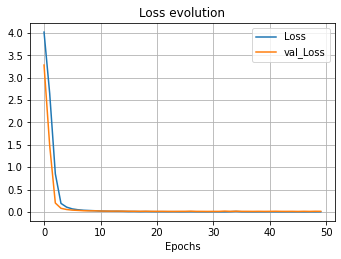

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy evolution')

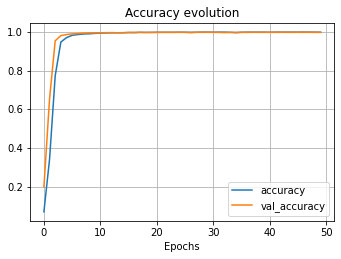

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [ ]:
y_pred = model.predict(np.array(X_test))

118/118 [==============================] - 2s 18ms/step


In [ ]:
y_pred.shape

(3776, 36)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#print(confusion_matrix(y_test, y_pred))

In [ ]:
y_pred[0]

array([5.18063456e-16, 2.74893674e-17, 5.61827467e-15, 3.13568738e-16,
       1.02362997e-12, 2.63560553e-14, 7.07040980e-13, 1.17115328e-16,
       1.37986188e-15, 5.84941768e-15, 1.84354199e-11, 6.33627189e-15,
       8.09103381e-13, 1.21950880e-15, 3.37581627e-14, 2.03183362e-15,
       1.61028915e-15, 7.30678519e-16, 1.53539659e-12, 4.01671663e-15,
       1.23573877e-17, 4.98292754e-16, 1.88267709e-14, 5.83288116e-16,
       1.02498822e-15, 1.74233106e-18, 1.35784548e-14, 1.03551240e-16,
       1.30967895e-17, 7.62241485e-12, 5.12074966e-11, 6.75673146e-12,
       1.21537668e-13, 7.70149888e-10, 1.00000000e+00, 1.04393534e-11],
      dtype=float32)

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
y_pred.shape

(3776, 36)

In [ ]:
y_pred=np.argmax(y_pred, axis=1)

In [ ]:
#y_pred = np_utils.to_categorical(y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.9986758474576272

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00       104
           4       1.00      0.99      0.99        99
           5       1.00      1.00      1.00       112
           6       1.00      1.00      1.00       140
           7       1.00      1.00      1.00       103
           8       1.00      1.00      1.00       104
           9       1.00      1.00      1.00       113
          10       0.99      1.00      1.00       106
          11       1.00      0.99      1.00       113
          12       1.00      1.00      1.00       115
          13       1.00      0.99      1.00       117
          14       0.99      1.00      0.99        87
          15       1.00      0.99      1.00       125
          16       1.00      1.00      1.00        96
          17       1.00    

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   output_dict=True)

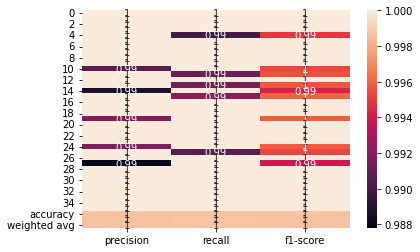

In [ ]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
import seaborn as sns

In [ ]:
clsf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

In [ ]:
clsf_report

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,120.000000
1,1.000000,1.000000,1.000000,127.000000
2,1.000000,1.000000,1.000000,62.000000
3,1.000000,1.000000,1.000000,104.000000
4,1.000000,0.989899,0.994924,99.000000
5,1.000000,1.000000,1.000000,112.000000
6,1.000000,1.000000,1.000000,140.000000
7,1.000000,1.000000,1.000000,103.000000
8,1.000000,1.000000,1.000000,104.000000
9,1.000000,1.000000,1.000000,113.000000


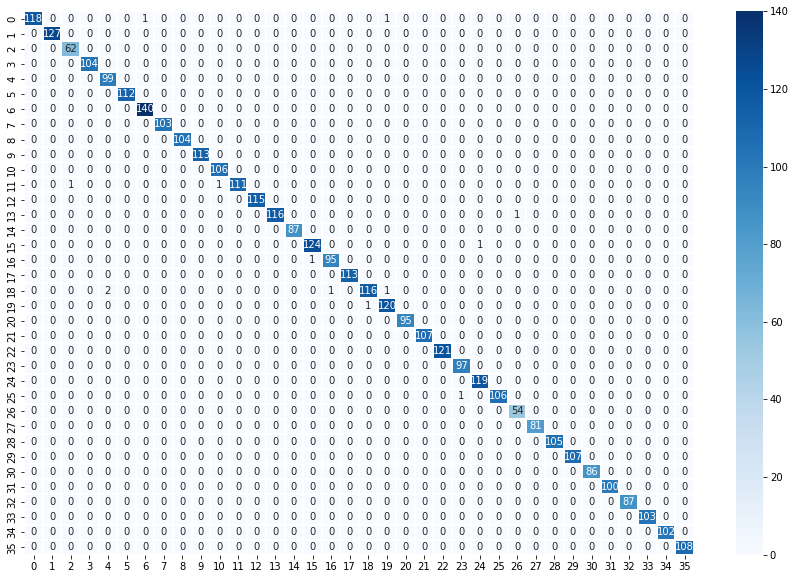

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g',cmap="Blues")

In [ ]:
model.save("MODEL_0810.h5")


Prediction for an image

In [ ]:
with open('labels.txt','w') as f:
    for i, j in zip(CATEGORY_MAP.keys(), CATEGORY_MAP.values()):
        f.write('{} {}\n'.format(i,j))
    f.close()

In [ ]:
with open('labels.txt','r') as f:
    classNames=f.read()
    print(classNames)
    f.close()

A 0
B 1
C 2
D 3
E 4
F 5
G 6
H 7
I 8
J 9
K 10
L 11
M 12
N 13
O 14
P 15
Q 16
R 17
S 18
T 19
U 20
V 21
W 22
X 23
Y 24
Z 25
0 26
1 27
2 28
3 29
4 30
5 31
6 32
7 33
8 34
9 35



In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('gesture-model.h5')

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Hand_Gesture/R/Image_1658898143.5361705.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (225, 225))

In [ ]:
inv_map = {v: k for k, v in CATEGORY_MAP.items()}

In [ ]:
prediction = model.predict(np.array([img]))

gesture_numeric = np.argmax(prediction[0])

print("Predicted Gesture: {}".format(inv_map[gesture_numeric]))

Predicted Gesture: R


In [ ]:
def preprocess(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (225, 225))
  return img
  
def predicted(img):
  prediction = model.predict(np.array([img]))

  gesture_numeric = np.argmax(prediction[0])
  # gesture_name = mapper(gesture_numeric)

  print("Predicted Gesture: {}".format(inv_map[gesture_numeric]))

In [ ]:
path ='/content/drive/MyDrive/Hand_Gesture/9/Image_1658906395.048329.jpg'
predicted(preprocess(path))

Predicted Gesture: 9
